### Melanoma Cancer Assignment

## Problem statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.


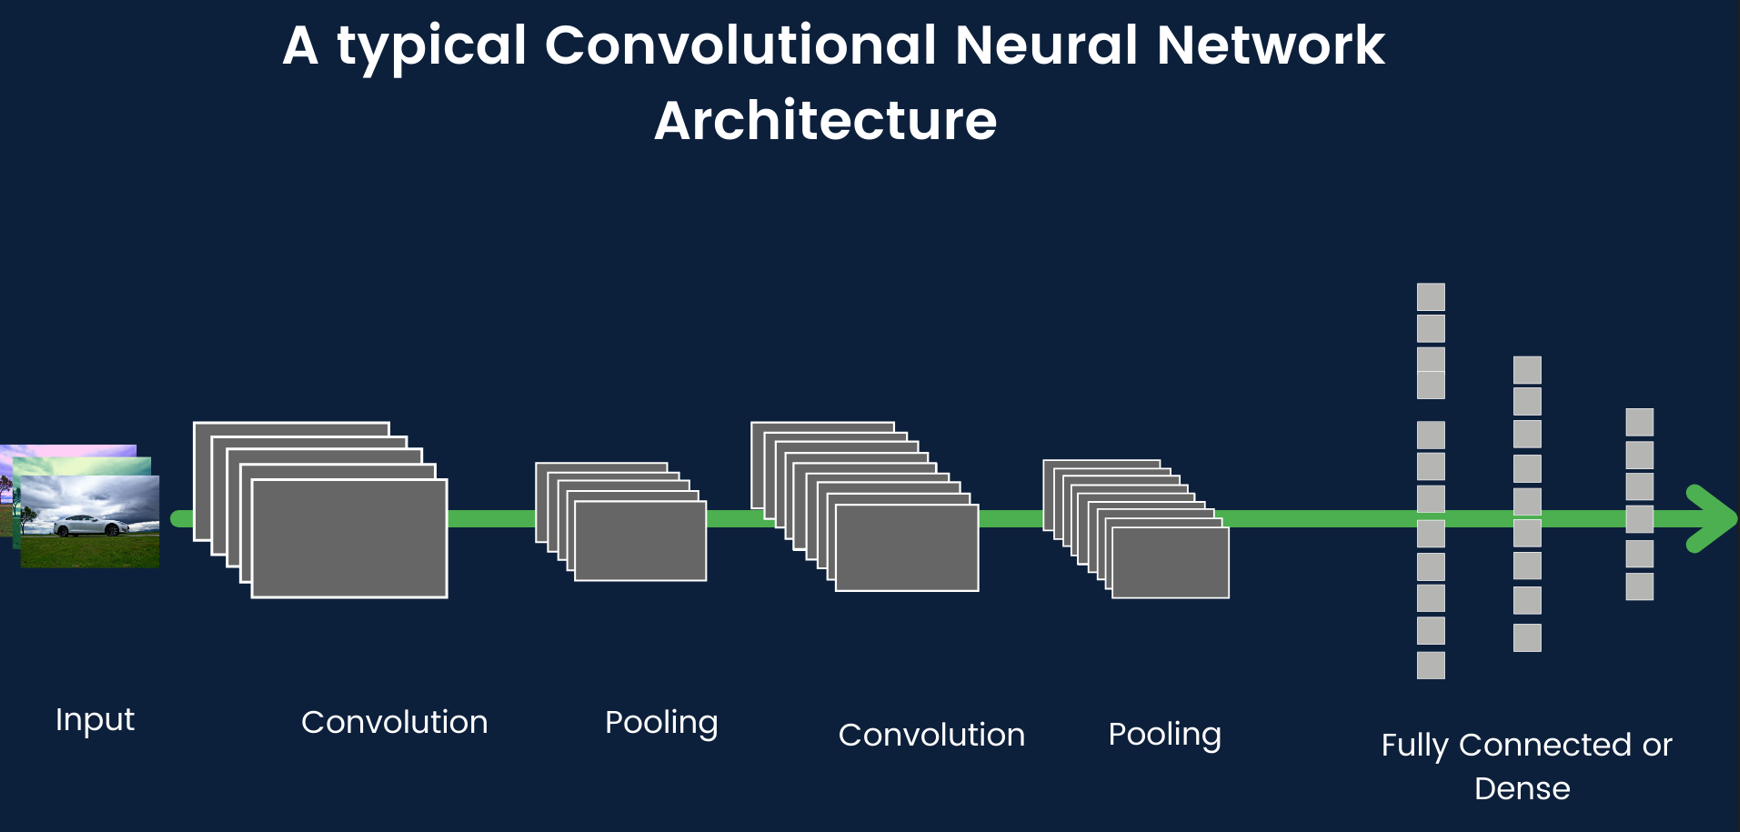




#### Project Pipeline - Assignment Evaluation
- Data Reading/Data Understanding → Defining the path for train and test images
- Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
- Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
- Model Building & training :
    - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~20 epochs
    - Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
- Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
- Model Building & training on the augmented data :
    - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~20 epochs
    - Write your findings after the model fit, see if the earlier issue is resolved or not?
- Class distribution: Examine the current class distribution in the training dataset
    - Which class has the least number of samples?
    - Which classes dominate the data in terms of the proportionate number of samples?
- Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
- Model Building & training on the rectified class imbalance data :
    - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~30 epochs
    - Write your findings after the model fit, see if the issues are resolved or not?

### Importing all the important libraries


In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from glob import glob
import os
import warnings
warnings.filterwarnings("ignore")


2023-07-11 09:23:50.640658: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 09:23:50.701071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 09:23:50.701990: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-11 09:23:51.819123: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [2]:
# Extracting the google drive - Melenoma data set to the colab environment
import shutil
if os.path.exists('Train'):
  shutil.rmtree('Train')
  shutil.rmtree('Test')
  !unzip 'Melanoma Assignment.zip'  > /dev/null
else:
  !unzip 'Melanoma Assignment.zip'  > /dev/null

In [3]:
# Listing the connected number of GPU for processing this notebook
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

Num GPUs: 0


In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Train")
data_dir_test = pathlib.Path('Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Dataset visualisation
→ Create a code to visualize one instance of all the nine classes present in the dataset

## Extrapolatory Data Analysis - EDA

In [6]:
# Creating the function for iterating over the folder to get the list of images and its catogory
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Label', 'Images'])



In [7]:
# Creating the summary of Train Images
df_train = class_distribution_count(data_dir_train)
df_train

Label  Images
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139

In [8]:
# Creating the summary of Test Images
df_test = class_distribution_count(data_dir_test)
df_test

Label  Images
0           actinic keratosis      16
1        basal cell carcinoma      16
2              dermatofibroma      16
3                    melanoma      16
4                       nevus      16
5  pigmented benign keratosis      16
6        seborrheic keratosis       3
7     squamous cell carcinoma      16
8             vascular lesion       3

### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

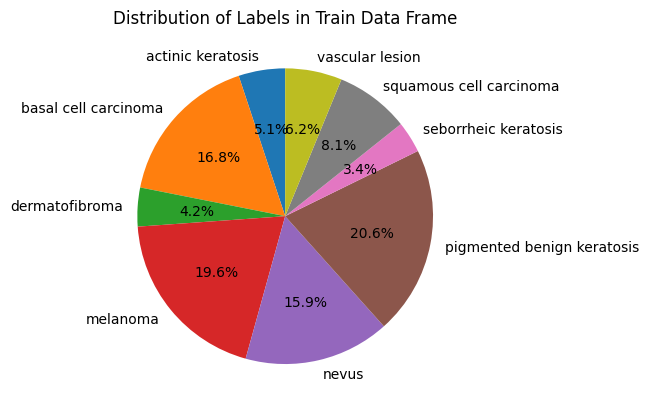

In [9]:
# Plot pie chart of train_df

plt.pie(df_train['Images'],autopct='%1.1f%%', startangle=90,labels = df_train['Label'])
plt.title('Distribution of Labels in Train Data Frame')
plt.show()

####Observation
  - spread of images across different classes

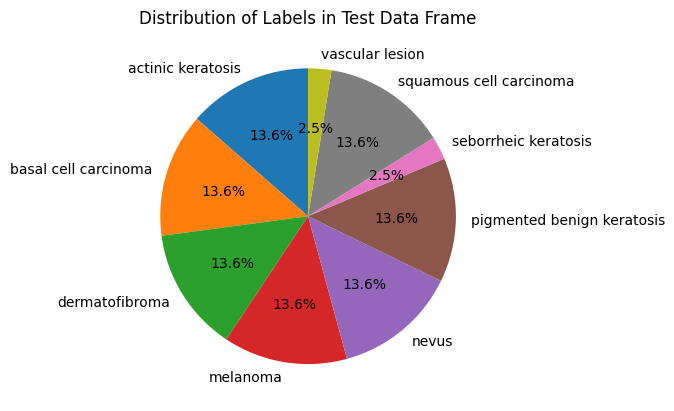

In [10]:
# Plot pie chart of test_df
plt.pie(df_test['Images'],autopct='%1.1f%%', startangle=90,labels = df_train['Label'])
plt.title('Distribution of Labels in Test Data Frame')
#plt.legend(df['Label'].unique(),loc='upper right')
plt.show()

#### Observation
 - spread of images across different classes

<Axes: xlabel='Images', ylabel='Label'>

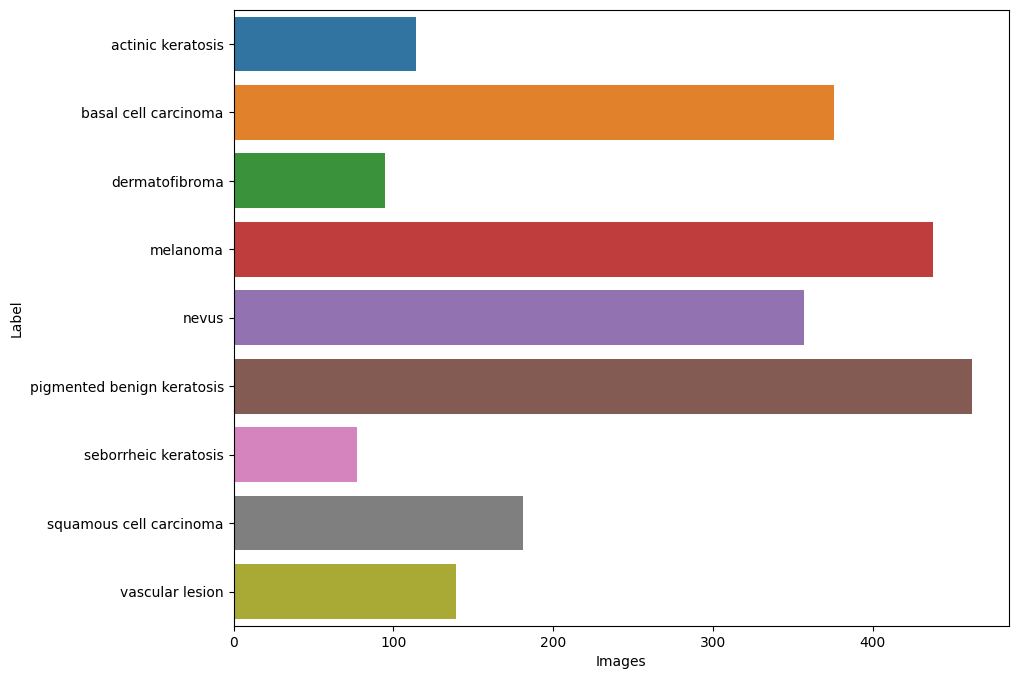

In [11]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="Images", y="Label", data=df_train,
            label="Class")

### Observation
  - spread of images across different classes

### Visualize distribution of classes in the training dataset.

Found 2239 files belonging to 9 classes.


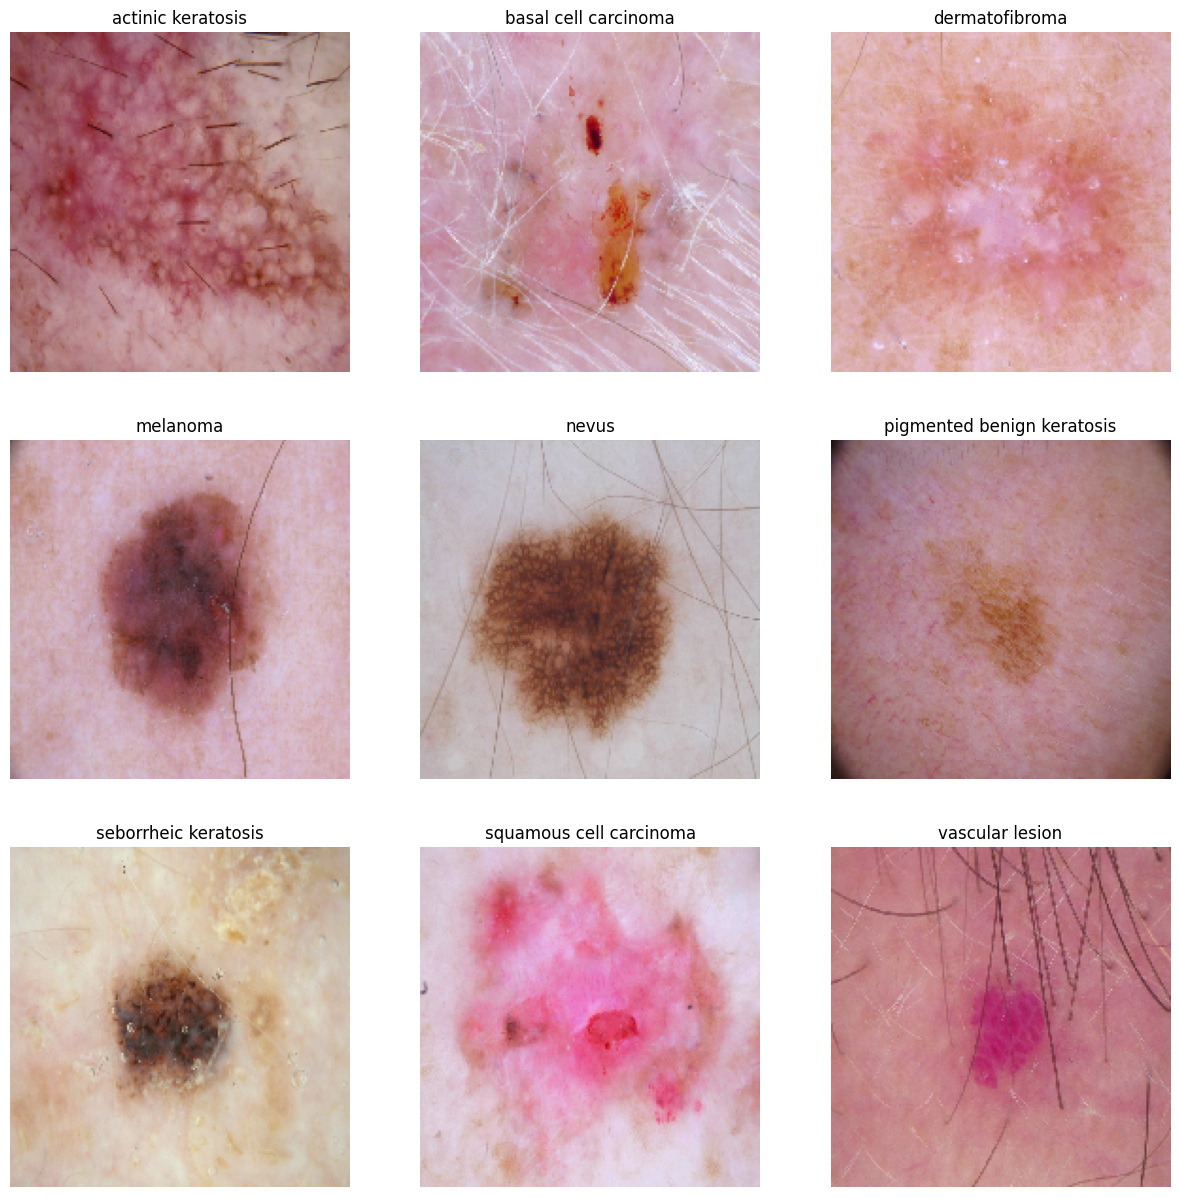

In [12]:
import matplotlib.pyplot as plt
#Visualize one instance of all the class present in the dataset.

#image_dataset_from_directory() will return a tf.data.Dataset that yields batches of images from the subdirectories.
#label_mode is categorial, the labels are a float32 tensor of shape (batch_size, num_classes), representing a one-hot encoding of the class index.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")
### your code goes here, you can use training or validation data to visualize

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [13]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,image_size=(180,180), label_mode='categorical',seed=123,subset="training",validation_split=0.2)


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180), label_mode='categorical',seed=123,subset="validation",validation_split=0.2)



Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [64]:
## Write your test dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, image_size=(180,180), batch_size=32,seed=123)

Found 118 files belonging to 9 classes.


In [17]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [18]:
val_class_names = val_ds.class_names
print(val_class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [70]:
test_class_names = test_ds.class_names
print(test_class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [19]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 1. Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`
- Model Building & training :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~20 epochs
- Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.

In [20]:

#Sequential allows you to create models layer-by-layer
model = Sequential()
#Rescaling Layer
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))


#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [21]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [22]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       7

### Train the model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 22s 343ms/step - loss: 2.0882 - accuracy: 0.2271 - val_loss: 1.8420 - val_accuracy: 0.3602
Epoch 2/20
56/56 [==============================] - 18s 324ms/step - loss: 1.6863 - accuracy: 0.4074 - val_loss: 1.5521 - val_accuracy: 0.4653
Epoch 3/20
56/56 [==============================] - 18s 325ms/step - loss: 1.5226 - accuracy: 0.4766 - val_loss: 1.5359 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 18s 322ms/step - loss: 1.4089 - accuracy: 0.5056 - val_loss: 1.4679 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 18s 322ms/step - loss: 1.3327 - accuracy: 0.5190 - val_loss: 1.3891 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 18s 325ms/step - loss: 1.2473 - accuracy: 0.5597 - val_loss: 1.5759 - val_accuracy: 0.5011
Epoch 7/20
56/56 [==============================] - 18s 323ms/step - loss: 1.2038 - accuracy: 0.5737 - val_loss: 1.4209 - val_accuracy: 0.5145

### Visualizing training results

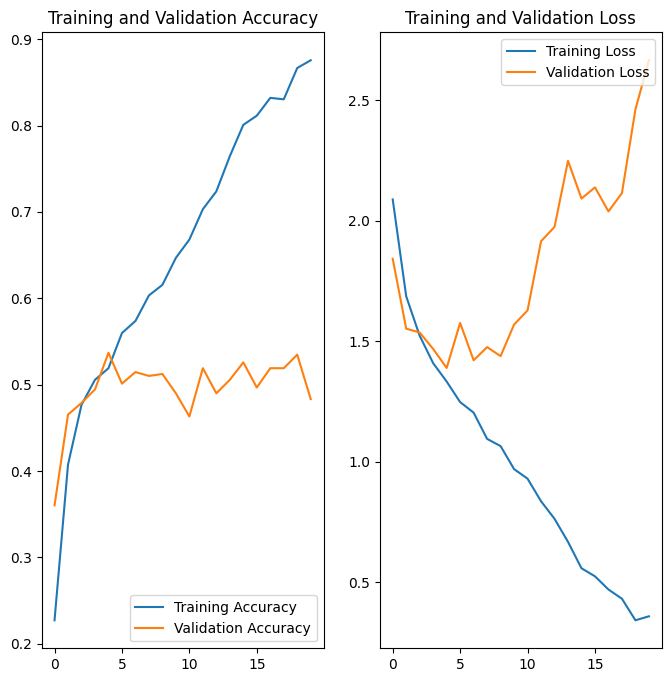

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation
   - Based on the Train vs Validation accuracy, model is overfitted on the training data.
   - High Training accuracy and less Validation accuracy
   - Need to optimize the model with Dropout , branch normalization, also tuning the optimizer

### Model Evaluation

In [25]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

# Thus we can clearly that model Overfit and we need to chose right data augumentation strategy

14/14 [==============================] - 1s 56ms/step - loss: 2.6655 - accuracy: 0.4832
Accuracy:  0.9034598469734192
Validation Accuracy:  0.48322147130966187
Loss:  0.25156041979789734
Validation Loss 2.6654508113861084


#### Observation
   - Based on the Train vs Validation accuracy, model is overfitted on the training data.
   - High Training accuracy and less Validation accuracy
   - Need to optimize the model with Dropout , branch normalization, also tuning the optimizer

### Generate batches of tensor image data with real-time data augmentation.



In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images



train_aug = datagen.flow_from_directory(data_dir_train,
    target_size = (180,180),
    classes = class_names,
    batch_size = 64
 )

test_aug = datagen.flow_from_directory(data_dir_test,
    target_size = (180,180),
    classes = class_names,
    batch_size = 64
)


Found 2239 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


Found 2239 files belonging to 9 classes.


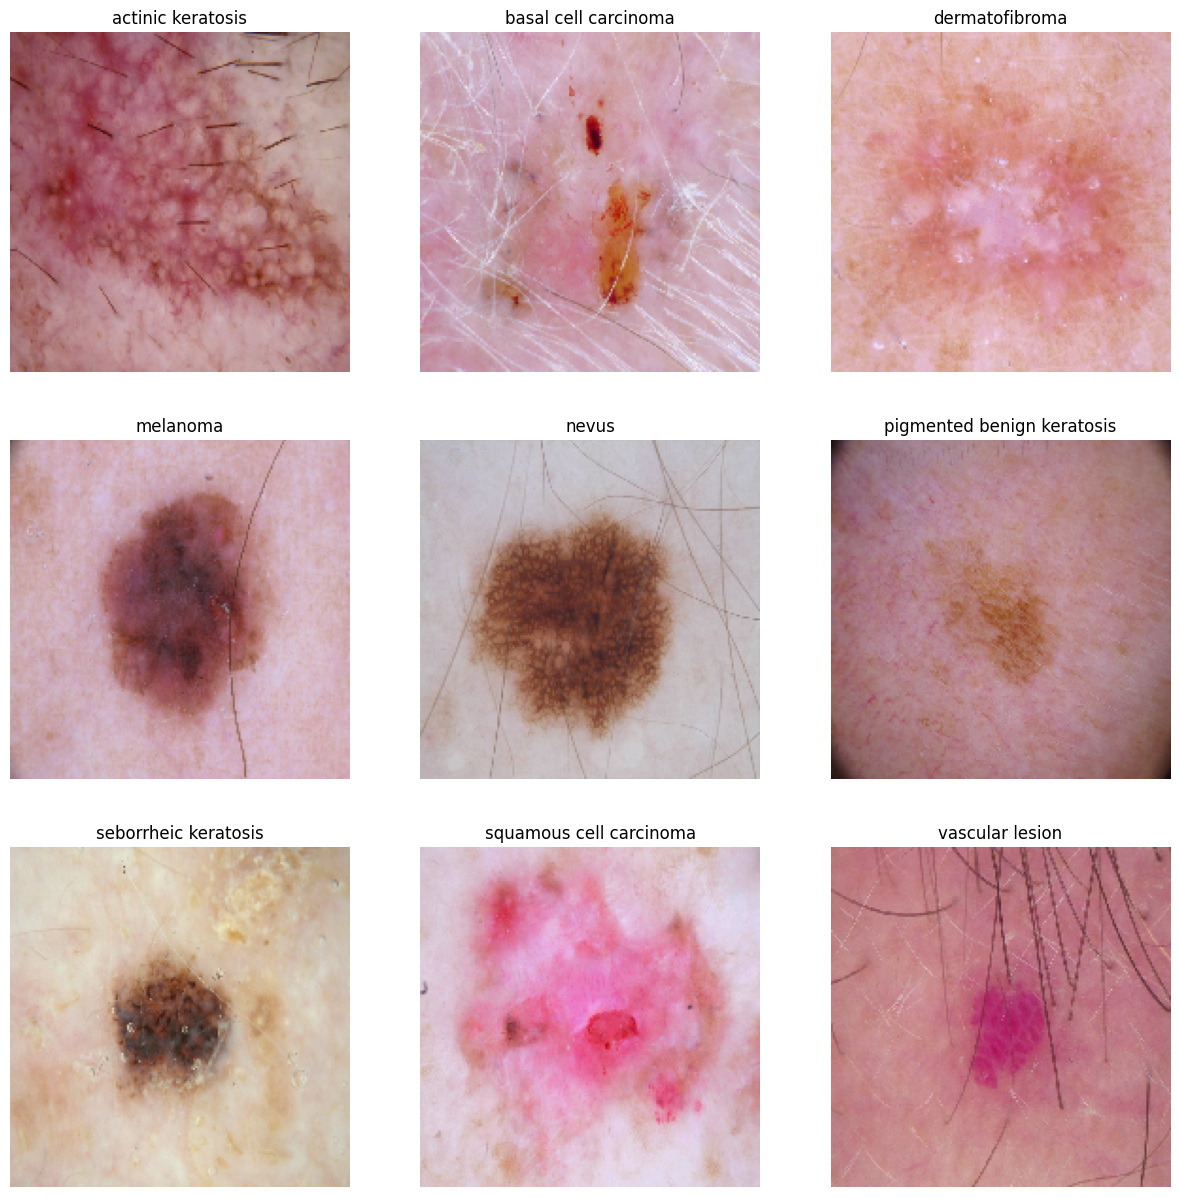

In [27]:
# visualize how your augmentation strategy works for one instance of training image.
image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),label_mode='categorical',seed=123)

#all the classes of Skin Cancer
class_names = image_dataset.class_names

#Dictionary to store the path of image as per the class
files_path_dict = {}

for c in class_names:
    files_path_dict[c] = list(map(lambda x:str(data_dir_train)+'/'+c+'/'+x,os.listdir(str(data_dir_train)+'/'+c)))

#Visualize image
plt.figure(figsize=(15,15))
index = 0
for c in class_names:
    path_list = files_path_dict[c][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(c)
    plt.axis("off")

#### Image -Augumentation Analysis

In [28]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",input_shape=(img_height, img_width, 3)),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.1),
])

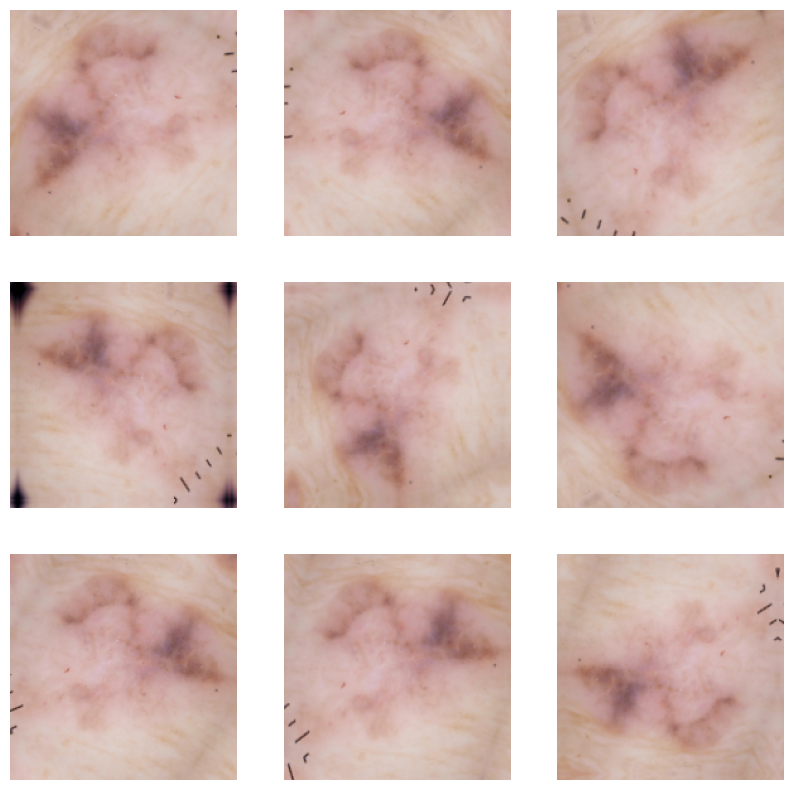

In [29]:
# Displaying the same image in multiple viewing dimensions
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(3):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### 2. Model Building & training on the augmented data :
- Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
- Choose an appropriate optimiser and loss function for model training
- Train the model for ~20 epochs
- Write your findings after the model fit, see if the earlier issue is resolved or not?

In [30]:
model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))


#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
# Adding Dropout Layer
model.add(layers.Dropout(0.25))


#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))


#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())
#Dense Layer
model.add(layers.Dense(128,activation='relu'))


#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

### Compiling the model

In [31]:
## Your code goes here
### Todo, choose an appropirate optimiser and loss function
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, amsgrad=False)
optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False)
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

In order to make the optimizer converge faster and closest to the global minimum of the loss function, i used an annealing method of the learning rate (LR).

The LR is the step by which the optimizer walks through the 'loss landscape'. The higher LR, the bigger are the steps and the quicker is the convergence. However the sampling is very poor with an high LR and the optimizer could probably fall into a local minima.

In [32]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

In [33]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                 

### Training the model

In [34]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 10
history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/20
56/56 [==============================] - 20s 339ms/step - loss: 2.3605 - accuracy: 0.1864 - val_loss: 2.0645 - val_accuracy: 0.2170 - lr: 0.0010
Epoch 2/20
56/56 [==============================] - 19s 333ms/step - loss: 1.8833 - accuracy: 0.2919 - val_loss: 1.7873 - val_accuracy: 0.4228 - lr: 0.0010
Epoch 3/20
56/56 [==============================] - 19s 337ms/step - loss: 1.6808 - accuracy: 0.4090 - val_loss: 1.6839 - val_accuracy: 0.4474 - lr: 0.0010
Epoch 4/20
56/56 [==============================] - 19s 333ms/step - loss: 1.6017 - accuracy: 0.4263 - val_loss: 1.5745 - val_accuracy: 0.4899 - lr: 0.0010
Epoch 5/20
56/56 [==============================] - 19s 334ms/step - loss: 1.5233 - accuracy: 0.4520 - val_loss: 1.4642 - val_accuracy: 0.5145 - lr: 0.0010
Epoch 6/20
56/56 [==============================] - 19s 333ms/step - loss: 1.4437 - accuracy: 0.4872 - val_loss: 1.4888 - val_accuracy: 0.4966 - lr: 0.0010
Epoch 7/20
56/56 [==============================] - 19s 333ms/st

### Visualizing the results

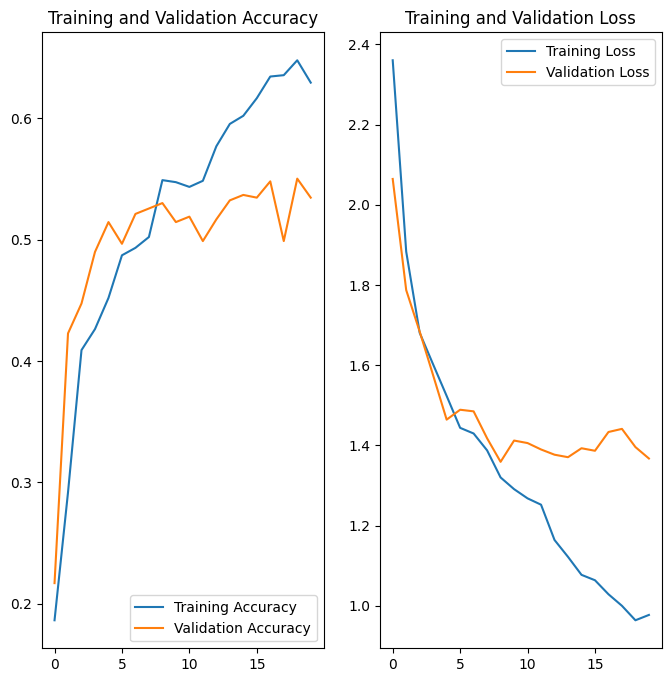

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observation
   - Added Branch Normalization,dropout and padding to address the overfit
   - Based on the model results, both Training and Validation accuracy went down
   - Model becomes underfit
   - One possibility can be due the class imbalance
   - There were total 9 classes of Target variables and their distribution is not similar
   - Need to Augumentation technology to create more images based on the existing images to address the class imbalance  

#### Find the distribution of classes in the training dataset.

In [62]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)
# Thus we can clearly that model Underfit and we need to chose right data augumentation strategy

43/43 [==============================] - 3s 63ms/step - loss: 0.4674 - accuracy: 0.8486
Accuracy:  0.9478857517242432
Validation Accuracy:  0.8485523462295532
Loss:  0.13188835978507996
Validation Loss 0.46744194626808167


In [37]:
df_train_aug = class_distribution_count(data_dir_train)

<Axes: xlabel='Images', ylabel='Label'>

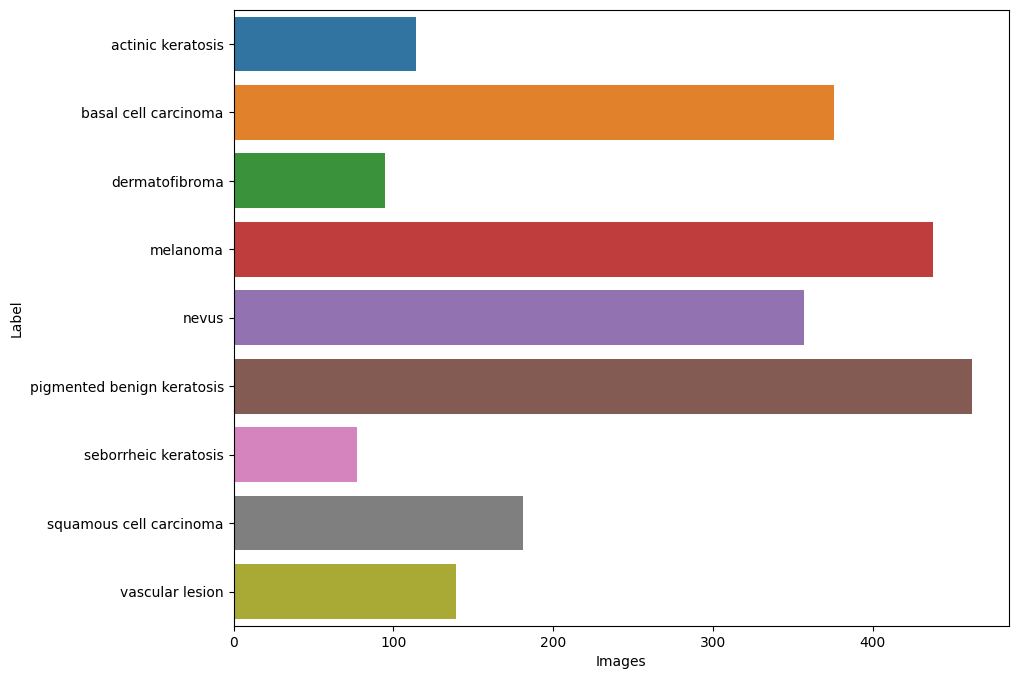

In [38]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="Images", y="Label", data=df_train_aug,
            label="Class")

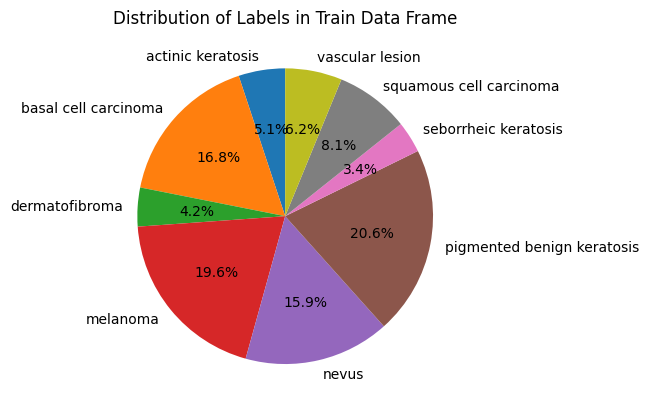

In [39]:
# Plot pie chart of train_df

plt.pie(df_train['Images'],autopct='%1.1f%%', startangle=90,labels = df_train['Label'])
plt.title('Distribution of Labels in Train Data Frame')
plt.show()

### Observation 
 - There were 9 classes of Target variables or image classes
 - There is a high imbalance of classes in both Train and Validation data sets

#### Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

####  Observation:
   - Based on the model results, both Training and Validation accuracy went down
   - Model becomes underfit
   - One possibility can be due the class imbalance
   - There were total 9 classes of Target variables and their distribution is not similar
   - Need to Augumentation technology to create more images based on the existing images to address the class imbalance  
#### Which class has the least number of samples?
        - Based on the data "seborrheic keratosis" having least samples, compared to others
#### Which classes dominate the data in terms proportionate number of samples?
        - Both "pigmented benign keratosis" and "Melanoma" dominate over remaining classes


In [40]:
# Creating the summary of Train Images
df_train = class_distribution_count(data_dir_train)
df_train

Label  Images
0           actinic keratosis     114
1        basal cell carcinoma     376
2              dermatofibroma      95
3                    melanoma     438
4                       nevus     357
5  pigmented benign keratosis     462
6        seborrheic keratosis      77
7     squamous cell carcinoma     181
8             vascular lesion     139

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [41]:
#!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [42]:
path_to_training_dataset= "Train/"
#path_to_training_dataset = pathlib.Path("/content/melanoma_data/Train/")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F11130084C0>: 100%|████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 398.27 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1113080370>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 400.76 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1112F01D50>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 397.54 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F11CC452230>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:05<00:00, 87.17 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F0FC86CA200>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:04<00:00, 101.21 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1113061E40>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 405.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0FAC4F45B0>: 100%|█████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 223.41 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F11130AF550>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 407.18 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1113081D80>: 100%|██████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:01<00:00, 403.87 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [43]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [44]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list[:10]

['Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026040.jpg_151b269a-1500-4307-945a-22838dd1dee9.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030463.jpg_cbd00cfd-4752-4b68-9e8f-fee7d02fdaec.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026709.jpg_f3efad7a-03f9-4fb8-a0fd-095fbad66180.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031506.jpg_1342032b-2356-44e3-9518-ed99c9d5cbcc.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026525.jpg_181f769d-c27b-43a4-9120-38808d92f9b6.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026468.jpg_db6b6c12-a750-4822-aca6-4f68c5007682.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026729.jpg_4aaea66f-42d3-4dc2-acf8-31816d3c1a43.jpg',
 'Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029141.jpg_fe8240e2-9961-440c-beec-76f0f79236b9.jpg',
 'Train/actinic keratosis/output/actinic

In [45]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:10]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [46]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [47]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)
new_df = df2

In [48]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [49]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [50]:
data_dir_train="Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [51]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [52]:
# Loading the Augumented new images
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,image_size=(180,180), label_mode='categorical',seed=123,subset="training",validation_split=0.2)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [53]:
# Loading the Augumented new images
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180), label_mode='categorical',seed=123,subset="validation",validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [65]:
# Loading the Augumented new images
test_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test, image_size=(180,180), batch_size=32,seed=123)

Found 118 files belonging to 9 classes.


#### **Todo:** 3. Create your model (make sure to include normalization)

In [55]:

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

#First Convulation layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

#Second Convulation Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
# Adding Dropout Layer
model.add(layers.Dropout(0.25))

#Third Convulation Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())
#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(class_names),activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [56]:
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False,decay=0.0)
optimizer =tf.keras.optimizers.legacy.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None,amsgrad=False)
model.compile(loss='categorical_crossentropy',optimizer=optimizer, metrics=['accuracy'])

In [57]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.00001)

#### **Todo:**  Train your model

In [58]:
epochs = 50

batch_size = 10
#history = model.fit(train_ds,epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])
history = model.fit(train_ds,epochs = epochs, verbose = 1, validation_data=val_ds , callbacks=[learning_rate_reduction])

Epoch 1/50
169/169 [==============================] - 65s 377ms/step - loss: 5.3041 - accuracy: 0.2991 - val_loss: 6.3999 - val_accuracy: 0.0846 - lr: 0.0010
Epoch 2/50
169/169 [==============================] - 63s 369ms/step - loss: 2.8110 - accuracy: 0.3550 - val_loss: 5.3561 - val_accuracy: 0.1210 - lr: 0.0010
Epoch 3/50
169/169 [==============================] - 63s 370ms/step - loss: 2.0328 - accuracy: 0.3945 - val_loss: 2.8467 - val_accuracy: 0.2524 - lr: 0.0010
Epoch 4/50
169/169 [==============================] - 63s 370ms/step - loss: 1.6541 - accuracy: 0.4364 - val_loss: 1.9825 - val_accuracy: 0.4172 - lr: 0.0010
Epoch 5/50
169/169 [==============================] - 62s 367ms/step - loss: 1.4062 - accuracy: 0.4850 - val_loss: 1.3381 - val_accuracy: 0.5330 - lr: 0.0010
Epoch 6/50
169/169 [==============================] - 62s 368ms/step - loss: 1.2906 - accuracy: 0.5172 - val_loss: 1.2149 - val_accuracy: 0.5293 - lr: 0.0010
Epoch 7/50
169/169 [==============================] 

#### **Todo:**  Visualize the model results

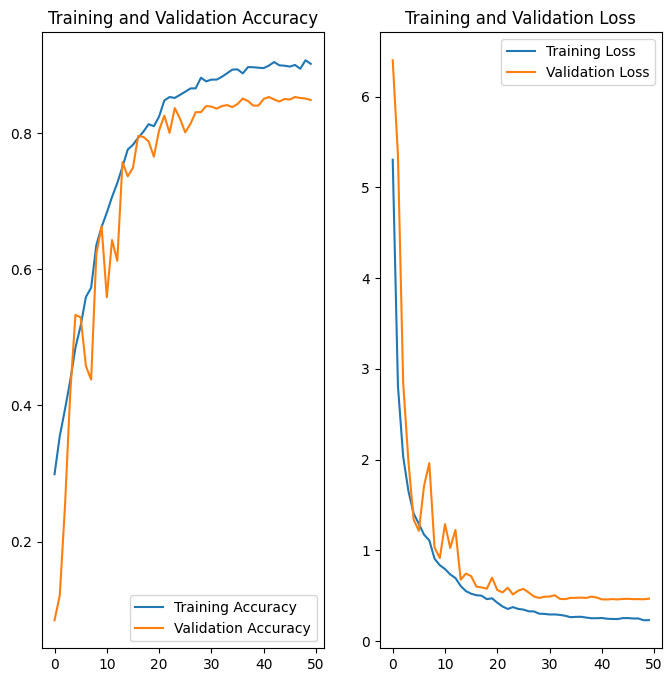

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

####  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [61]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)


43/43 [==============================] - 3s 62ms/step - loss: 0.4674 - accuracy: 0.8486
Accuracy:  0.9478857517242432
Validation Accuracy:  0.8485523462295532
Loss:  0.13188837468624115
Validation Loss 0.4674418866634369


### Observation
 - Class imbalance was visible across the images and Neural Network model expect large amount of data for the learning part
 - Using Augumentor , class imbalance was addressed and also add more images per class
 - Executed the same model against new data set and significant improvement in both Training and Test accuracy and it addressed the overfit too.
 - Model accuracy went up to 90% which is significant

### Summary of Melanoma Case Study 
- Business Problem Statement
    - To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths.
       A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.
- Assessment Overview
    - Based on this case study , 3 independent models created and validated the Training and validation accuracy
    - With out Drop out and Normalization layer , Training accuracy was high and validation accuracy was too low. This is a clear indication of Overfit
    - By adding drop out and Normalization layer , overfit was able to address to some level , but both Training and Validation accuracy went down
    - This is due to the class imbalance and the availability of the Training data
    - Based on the analysis , class imbalance was visible across the images , to address this introduced class Augumentation
    - Using the Image Augumentation technology , both class imbalance and Training data scarciity addressed.
    - Created additional images using augumentation and ran the model with fine tuned optimizer along with drop out and Branch Normalization
    - This delivered a good training and validation accuracy and addressed the overfit
- Key Findings from this excercise
     - Class imbalance was visible across the images and Neural Network model expect large amount of data for the learning part
     - Using Augumentor , class imbalance was addressed and also add more images per class
     - Executed the same model against new data set and significant improvement in both Training and Test accuracy and it addressed the overfit too.
     - Model accuracy went up to 90% which is significant